<a href="https://colab.research.google.com/github/panchambanerjee/data_synthesis/blob/main/new_trial_sdv_multitable_WORKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From SDV Examples

In [1]:
%pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4


In [1]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality='multi_table',
    dataset_name='fake_hotels'
)

metadata

{
    "tables": {
        "guests": {
            "columns": {
                "guest_email": {
                    "sdtype": "email",
                    "pii": true
                },
                "hotel_id": {
                    "sdtype": "id",
                    "regex_format": "[A-Za-z]{5}"
                },
                "has_rewards": {
                    "sdtype": "boolean"
                },
                "room_type": {
                    "sdtype": "categorical"
                },
                "amenities_fee": {
                    "sdtype": "numerical",
                    "computer_representation": "Float"
                },
                "checkin_date": {
                    "sdtype": "datetime",
                    "datetime_format": "%d %b %Y"
                },
                "checkout_date": {
                    "sdtype": "datetime",
                    "datetime_format": "%d %b %Y"
                },
                "room_rate": {
                   

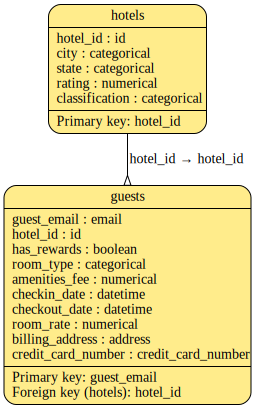

In [2]:
metadata.visualize()

In [3]:
from sdv.multi_table import HMASynthesizer

synthesizer = HMASynthesizer(metadata)
synthesizer.fit(real_data)

Preprocess Tables: 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]



Learning relationships:


(1/1) Tables 'hotels' and 'guests' ('hotel_id'): 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]


Modeling Tables: 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]


In [4]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
## Let's try and create our own tables

parent_table = pd.DataFrame(data={
    'cust_id': [1, 2, 3, 4, 5],
    'name': ["A", "B", "C", "D", "E"]
})

child_table = pd.DataFrame(data={
    'cust_id': [1, 2, 3, 4, 5],
    'parent_id': [1, 3, 4, 2, 5],
    'age_group': [1, 3, 3, 1, 2],
    'income_group': [2, 4, 5, 2, 4]
})

real_data = {
    'parent_table': parent_table,
    'child_table': child_table
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
from sdv.metadata import MultiTableMetadata

metadata = MultiTableMetadata()

metadata.detect_from_dataframes(
    data={
        'parent_table': parent_table,
        'child_table': child_table
    }
)

In [30]:
metadata

{
    "tables": {
        "parent_table": {
            "columns": {
                "cust_id": {
                    "sdtype": "numerical"
                },
                "name": {
                    "sdtype": "categorical"
                }
            }
        },
        "child_table": {
            "columns": {
                "cust_id": {
                    "sdtype": "numerical"
                },
                "parent_id": {
                    "sdtype": "numerical"
                },
                "age_group": {
                    "sdtype": "numerical"
                },
                "income_group": {
                    "sdtype": "numerical"
                }
            }
        }
    },
    "relationships": [],
    "METADATA_SPEC_VERSION": "MULTI_TABLE_V1"
}

In [31]:
metadata.update_column(
    table_name='parent_table',
    column_name='cust_id',
    sdtype='id')

metadata.update_column(
    table_name='child_table',
    column_name='cust_id',
    sdtype='id')

metadata.update_column(
    table_name='child_table',
    column_name='parent_id',
    sdtype='id')


metadata.set_primary_key(table_name='parent_table', column_name='cust_id')
metadata.set_primary_key(table_name='child_table', column_name='parent_id')

In [32]:
metadata

{
    "tables": {
        "parent_table": {
            "columns": {
                "cust_id": {
                    "sdtype": "id"
                },
                "name": {
                    "sdtype": "categorical"
                }
            },
            "primary_key": "cust_id"
        },
        "child_table": {
            "columns": {
                "cust_id": {
                    "sdtype": "id"
                },
                "parent_id": {
                    "sdtype": "id"
                },
                "age_group": {
                    "sdtype": "numerical"
                },
                "income_group": {
                    "sdtype": "numerical"
                }
            },
            "primary_key": "parent_id"
        }
    },
    "relationships": [],
    "METADATA_SPEC_VERSION": "MULTI_TABLE_V1"
}

In [33]:
metadata.add_relationship(
    parent_table_name='parent_table',
    child_table_name='child_table',
    parent_primary_key='cust_id',
    child_foreign_key='cust_id'
)


metadata

{
    "tables": {
        "parent_table": {
            "columns": {
                "cust_id": {
                    "sdtype": "id"
                },
                "name": {
                    "sdtype": "categorical"
                }
            },
            "primary_key": "cust_id"
        },
        "child_table": {
            "columns": {
                "cust_id": {
                    "sdtype": "id"
                },
                "parent_id": {
                    "sdtype": "id"
                },
                "age_group": {
                    "sdtype": "numerical"
                },
                "income_group": {
                    "sdtype": "numerical"
                }
            },
            "primary_key": "parent_id"
        }
    },
    "relationships": [
        {
            "parent_table_name": "parent_table",
            "child_table_name": "child_table",
            "parent_primary_key": "cust_id",
            "child_foreign_key": "cust_id"
     

In [34]:
from sdv.multi_table import HMASynthesizer

synthesizer = HMASynthesizer(metadata)
synthesizer.fit(real_data)

Preprocess Tables: 100%|██████████| 2/2 [00:00<00:00, 13.67it/s]



Learning relationships:


(1/1) Tables 'parent_table' and 'child_table' ('cust_id'): 100%|██████████| 5/5 [00:00<00:00, 30.32it/s]


Modeling Tables: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


In [35]:
synthetic_data = synthesizer.sample(scale=2)

In [36]:
synthetic_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


{'parent_table':    cust_id name
 0        0    E
 1        1    A
 2        2    B
 3        3    B
 4        4    C
 5        5    D
 6        6    B
 7        7    C
 8        8    C
 9        9    E,
 'child_table':    cust_id  parent_id  age_group  income_group
 0        0          0          3             5
 1        1          1          1             2
 2        2          2          1             2
 3        3          3          3             5
 4        4          4          2             2
 5        5          5          1             2
 6        6          6          1             3
 7        7          7          3             5
 8        8          8          3             5
 9        9          9          1             3}

In [38]:
synthetic_data['parent_table'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cust_id,name
0,0,E
1,1,A
2,2,B
3,3,B
4,4,C


In [39]:
synthetic_data['child_table'].head()

,cust_id,parent_id,age_group,income_group
0,0,0,3,5
1,1,1,1,2
2,2,2,1,2
3,3,3,3,5
4,4,4,2,2


In [40]:
from sdv.evaluation.multi_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata,
    verbose=False
)

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

In [42]:
fig = quality_report.get_visualization('Column Shapes', table_name='child_table')
fig.show()

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

In [44]:
# fig = quality_report.get_visualization('Column Shapes', table_name='parent_table')
# fig.show()

In [45]:
from sdv.evaluation.multi_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='income_group',
    table_name='child_table',
    metadata=metadata
)

fig.show()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



In [46]:
from sdv.evaluation.multi_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['income_group', 'age_group'],
    table_name='child_table',
    metadata=metadata
)

fig.show()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_modul